Exercise 1: A spam filter using SVM

Part A : Build a spam filter using a pre-processed dataset

In [2]:
#Load the data using pandas
#Import all the required packages
import pandas as pd
import numpy as np
import io
import requests
import matplotlib.pyplot as plt

#Reading the content from the HTML page using requests package
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
data = requests.get(url).content

#Splitting the data into rows and columns
cleanedData = data.decode('utf-8').split('\r\n')
rowsAndColumns = [each.split(',') for each in cleanedData]

df = pd.DataFrame(rowsAndColumns)
df = df.loc[0:4600,:]

print(df.tail())

        0  1     2  3     4     5  6  7  8  9  ...     48     49 50     51 52  \
4596  0.31  0  0.62  0     0  0.31  0  0  0  0 ...      0  0.232  0      0  0   
4597     0  0     0  0     0     0  0  0  0  0 ...      0      0  0  0.353  0   
4598   0.3  0   0.3  0     0     0  0  0  0  0 ...  0.102  0.718  0      0  0   
4599  0.96  0     0  0  0.32     0  0  0  0  0 ...      0  0.057  0      0  0   
4600     0  0  0.65  0     0     0  0  0  0  0 ...      0      0  0  0.125  0   

     53     54 55   56 57  
4596  0  1.142  3   88  0  
4597  0  1.555  4   14  0  
4598  0  1.404  6  118  0  
4599  0  1.147  5   78  0  
4600  0   1.25  5   40  0  

[5 rows x 58 columns]


In [3]:
#Removing length parameters as they are not frequencies!
cols = [54,55,56]
df.drop(df.columns[cols],axis=1,inplace=True)
print(df.tail())

        0  1     2  3     4     5  6  7  8  9  ...    45 46 47     48     49  \
4596  0.31  0  0.62  0     0  0.31  0  0  0  0 ...  0.31  0  0      0  0.232   
4597     0  0     0  0     0     0  0  0  0  0 ...     2  0  0      0      0   
4598   0.3  0   0.3  0     0     0  0  0  0  0 ...   1.2  0  0  0.102  0.718   
4599  0.96  0     0  0  0.32     0  0  0  0  0 ...  0.32  0  0      0  0.057   
4600     0  0  0.65  0     0     0  0  0  0  0 ...  0.65  0  0      0      0   

     50     51 52 53 57  
4596  0      0  0  0  0  
4597  0  0.353  0  0  0  
4598  0      0  0  0  0  
4599  0      0  0  0  0  
4600  0  0.125  0  0  0  

[5 rows x 55 columns]


In [4]:
#Importing necessary sklearn packages
from sklearn.svm import SVC
from sklearn.datasets import load_svmlight_file
from sklearn.datasets import dump_svmlight_file
from sklearn.model_selection import train_test_split

#Train/Test split
x = df.iloc[:,0:53]
y = df.iloc[:,54]

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.30, random_state=15)


#Convert DF to libsvm format by normal python code
with open('libSvmTrain.dat','w') as f:
    for j in range(xTrain.shape[0]):
        for i in range(xTrain.shape[1]):
            if xTrain.iloc[j][i] != 0:
                f.write(" ".join([str(int(yTrain.iloc[j]))] + ["{}:{}".format(i,xTrain.iloc[j][i])]))
                
with open('libSvmTest.dat','w') as f:
    for j in range(xTest.shape[0]):
        for i in range(xTest.shape[1]):
            if xTest.iloc[j][i] != 0:
                f.write(" ".join([str(int(yTest.iloc[j]))] + ["{}:{}".format(i,xTest.iloc[j][i])]))
        
#Using Sklearn        
#Concatenate to use in function
train = pd.concat([xTrain, yTrain], axis=1)
test = pd.concat([xTest, yTest], axis=1)
print(train.iloc[:,-1].unique())

#Converting input to libSvm format
dump_svmlight_file(train.iloc[:,0:53],train.iloc[:,-1],"libSvmTrain.dat")
dump_svmlight_file(test.iloc[:,0:53],test.iloc[:,-1],"libSvmTest.dat")

#Reading from libSvm format to use in scikit
dataTrain = load_svmlight_file("libSvmTrain.dat")
dataTest = load_svmlight_file("libSvmTest.dat")

#Seperating to x and y
xTrain,yTrain = dataTrain[0],dataTrain[1]
xTest,yTest = dataTest[0],dataTest[1]

['1' '0']


In [4]:
cValue,accuracy = [],[]
for c in np.arange(0.1,100,0.4):
    model = SVC(C = c)
    model.fit(xTrain, yTrain)
    accuracy.append(model.score(xTest,yTest))
    cValue.append(c)

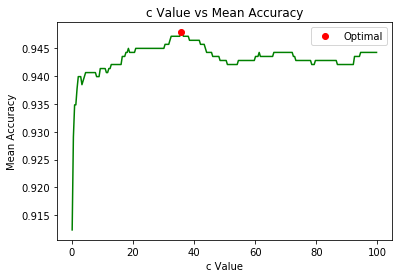

In [5]:
#Storing results in df
result = pd.DataFrame(
    {'c': cValue,
     'accuracy': accuracy
    })

#Optimal C
optimal = result.iloc[result['accuracy'].idxmax()]
cOptimal = optimal['c']

#Plotting the graphs
plt.plot(cValue,accuracy,color = 'g')
plt.plot(optimal['c'],optimal['accuracy'],'o',color = 'red',label = 'Optimal')
plt.xlabel('c Value')
plt.ylabel('Mean Accuracy')
plt.title('c Value vs Mean Accuracy')
plt.legend()
plt.show()

In [6]:
print(optimal)

accuracy     0.947864
c           35.700000
Name: 89, dtype: float64


In [5]:
from sklearn.metrics import accuracy_score 
from sklearn import metrics
#Fitting for best c Value
model = SVC(C = 35.7)
model.fit(xTrain, yTrain)

#Error measures Svm
print("\n\nSupport Vector Machine\n")
print("Model summary\n",metrics.classification_report(yTest, model.predict(xTest)))
print("\nConfusion Matrix\n",metrics.confusion_matrix(yTest, model.predict(xTest)))
print ("\nAccuracy\n",accuracy_score(yTest, model.predict(xTest)))



Support Vector Machine

Model summary
              precision    recall  f1-score   support

        0.0       0.95      0.97      0.96       856
        1.0       0.94      0.92      0.93       525

avg / total       0.95      0.95      0.95      1381


Confusion Matrix
 [[827  29]
 [ 43 482]]

Accuracy
 0.947863866763


Part B : Pre-processed a dataset and learn SVM

In [6]:
msg = pd.read_csv('SMSSpamCollection', sep='\t',names=["label", "message"])
print(msg.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [7]:
#Train/Test split
x = msg['message']
y = msg['label']
y = pd.DataFrame([1 if x == 'ham' else 0 for x in y])

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.30, random_state=15)
#print(type(xTrain),type(yTrain))
#Concatenate to use in function
train = pd.concat([xTrain, yTrain], axis=1)
test = pd.concat([xTest, yTest], axis=1)

In [8]:
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

#Stemming the words, reducing to root word
stemm = SnowballStemmer("english")
xTrain['stemmed'] = xTrain.map(lambda x: ' '.join([stemm.stem(y) for y in x.split(' ')]))
xTest['stemmed'] = xTest.map(lambda x: ' '.join([stemm.stem(y) for y in x.split(' ')]))

#Converting to Tfid vectors
tfid = TfidfVectorizer(min_df=.0025, max_df=.1, stop_words='english',binary=True, use_idf=True)
tfidTrainX = tfid.fit_transform(xTrain.stemmed.dropna())
tfidTestX = tfid.transform(xTest.stemmed.dropna())



In [41]:
#Using SVM classifier and grid search
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

#Initializing parameters
cGrid = np.arange(0.1,100, 0.5)
kernelGrid = ['linear','rbf']
degreeGrid = np.arange(1,50, 5)

parameters = {'C':cGrid,
             'kernel':kernelGrid,
             'degree':degreeGrid}

#cv
model = SVC()
grid = GridSearchCV(model,param_grid = parameters, cv=5,scoring='accuracy')
grid.fit(tfidTrainX, yTrain)
result = pd.DataFrame(grid.cv_results_)

Linear Kernel : Optimal c Value -  3.1  Optimal degree -  1  Accuracy -  0.977692307692
Rbf Kernel : Optimal c Value -  96.6  Optimal degree -  1  Accuracy -  0.975128205128


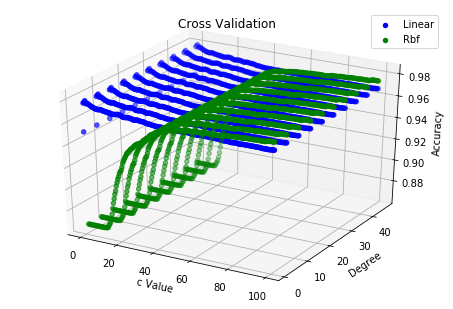

In [14]:
accuracyLinear = result.loc[result['param_kernel'] == 'linear']
accuracyRbf = result.loc[result['param_kernel'] == 'rbf']

optimalL = accuracyLinear.iloc[accuracyLinear['mean_test_score'].idxmax()]
cOptimalL = optimalL['param_C']
degOptimalL = optimalL['param_degree']

optimalR = accuracyRbf.loc[accuracyRbf['mean_test_score'].idxmax()]
cOptimalR = optimalR['param_C']
degOptimalR = optimalR['param_degree']

print("Linear Kernel : Optimal c Value - ",cOptimalL," Optimal degree - ",degOptimalL," Accuracy - ",optimalL['mean_test_score'])
print("Rbf Kernel : Optimal c Value - ",cOptimalR," Optimal degree - ",degOptimalR," Accuracy - ",optimalR['mean_test_score'])

#Plot graphs
#GridSearch - Lasso Graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(accuracyLinear['param_C'],accuracyLinear['param_degree'],accuracyLinear['mean_test_score'],color = 'blue',label = 'Linear')
ax.scatter3D(accuracyRbf['param_C'],accuracyRbf['param_degree'],accuracyRbf['mean_test_score'],color = 'green',label = 'Rbf')
ax.set_xlabel('c Value')
ax.set_ylabel('Degree')
ax.set_zlabel('Accuracy')
plt.legend()
plt.title('Cross Validation')
plt.show()

Exercise 2: Compare SVM based spam filter with another model

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

#Grid search for decision tree
parameters = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 5, 10, 15, 20, 25, 30, 40, 50],
              "max_depth": [None, 2, 5, 10, 15, 20, 25, 30, 40, 50],
              "min_samples_leaf": [1, 5, 10, 15, 20],
              "max_leaf_nodes": [None, 5, 10, 20, 30, 40, 50],
              }

#Base model
tree = DecisionTreeClassifier()

#cv
grid = GridSearchCV(tree,param_grid = parameters,cv=5,scoring='accuracy')
grid.fit(tfidTrainX, yTrain)
resultTree = pd.DataFrame(grid.cv_results_)

In [13]:
svmDeg = 1
svmC = 3.1
#treeCv = grid.best_params_

#Best Tree model
tree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 20,max_leaf_nodes = None,min_samples_leaf = 1,min_samples_split = 2)
tree.fit(tfidTrainX, yTrain)

#Prediction
expected = yTest
predictedTree = tree.predict(tfidTestX)
trainPredictedTree = tree.predict(tfidTrainX)

#Best SVM model
svm = SVC(C = svmC,degree = svmDeg,kernel = 'linear')
svm.fit(tfidTrainX, yTrain)

#Prediction
predictedSvm = svm.predict(tfidTestX)
trainPredictedSvm = svm.predict(tfidTrainX)

#Error measures Tree
print("Decision Tree - Test data\n")
print("Model summary\n",metrics.classification_report(expected, predictedTree))
print("\nConfusion Matrix\n",metrics.confusion_matrix(expected, predictedTree))
print ("\nAccuracy\n",accuracy_score(expected, predictedTree))

#Error measures Svm
print("\n\nSupport Vector Machine - Test Data\n")
print("Model summary\n",metrics.classification_report(expected, predictedSvm))
print("\nConfusion Matrix\n",metrics.confusion_matrix(expected, predictedSvm))
print ("\nAccuracy\n",accuracy_score(expected, predictedSvm))

#Error measures Tree
print("Decision Tree - Train data\n")
print("Model summary\n",metrics.classification_report(yTrain, trainPredictedTree))
print("\nConfusion Matrix\n",metrics.confusion_matrix(yTrain, trainPredictedTree))
print ("\nAccuracy\n",accuracy_score(yTrain, trainPredictedTree))

#Error measures Svm
print("\n\nSupport Vector Machine - Train Data\n")
print("Model summary\n",metrics.classification_report(yTrain, trainPredictedSvm))
print("\nConfusion Matrix\n",metrics.confusion_matrix(yTrain, trainPredictedSvm))
print ("\nAccuracy\n",accuracy_score(yTrain, trainPredictedSvm))

/home/kritz/anaconda3/envs/scripts/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Decision Tree - Test data

Model summary
              precision    recall  f1-score   support

          0       0.92      0.82      0.87       224
          1       0.97      0.99      0.98      1448

avg / total       0.97      0.97      0.97      1672


Confusion Matrix
 [[ 183   41]
 [  15 1433]]

Accuracy
 0.966507177033


Support Vector Machine - Test Data

Model summary
              precision    recall  f1-score   support

          0       0.95      0.91      0.93       224
          1       0.99      0.99      0.99      1448

avg / total       0.98      0.98      0.98      1672


Confusion Matrix
 [[ 204   20]
 [  10 1438]]

Accuracy
 0.982057416268
Decision Tree - Train data

Model summary
              precision    recall  f1-score   support

          0       0.99      0.92      0.96       523
          1       0.99      1.00      0.99      3377

avg / total       0.99      0.99      0.99      3900


Confusion Matrix
 [[ 481   42]
 [   3 3374]]

Accuracy
 0.988461538462

